In [25]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from config import api_key
import requests
import json
from datetime import datetime
import scipy.stats as stats
%matplotlib inline



In [41]:
#Create a for loop with a url query for 3 tickers to save daily open, close, ticker & date information. 
#Reorganize the columns

tickers = ["AAPL", "GOOG", "AMZN"]

dummy = pd.DataFrame(columns = ["ticker", "o", "c", "t"])

#create loop to run through URL & save info into lists
for name in tickers:
    base_url = f"https://api.polygon.io/v2/aggs/ticker/{name}/range/1/week/2017-01-01/2022-10-24?adjusted=true&sort=asc&limit=50000&apiKey={api_key}"
    response = requests.get(base_url).json()
    datadata = pd.json_normalize(response["results"])
    datadata["ticker"] = name
    datadata = datadata[["ticker", "o", "c", "t"]]

#print(datadata)
    dummy = pd.concat([dummy,datadata])
dummy.columns=["ticker", "open", "close", "date"]

#pd.concat([dummy,datadata],axis=0)

#Convert date to date 
dummy['date'] = pd.to_datetime(dummy['date'],unit='ms')
dummy["date"] = pd.to_datetime(dummy["date"]).dt.date
#delete open
del dummy["open"]
print(dummy.head())

  ticker    close        date
0   AAPL  29.4775  2017-01-01
1   AAPL  29.7600  2017-01-08
2   AAPL  30.0000  2017-01-15
3   AAPL  30.4875  2017-01-22
4   AAPL  32.2700  2017-01-29


In [42]:
#divide dataframes into df's by ticker
aapl_weekly = dummy[dummy["ticker"] == "AAPL"]
aapl_weekly = pd.DataFrame(aapl_weekly)
amzn_weekly = dummy[dummy["ticker"] == "AMZN"]
amzn_weekly = pd.DataFrame(amzn_weekly)
goog_weekly = dummy[dummy["ticker"] == "GOOG"]
goog_weekly = pd.DataFrame(goog_weekly)
#rename columns
aapl_weekly.rename(columns = {'close':'AAPL'}, inplace = True)
amzn_weekly.rename(columns = {'close':'AMZN'}, inplace = True)
goog_weekly.rename(columns = {'close':'GOOG'}, inplace = True)
#calculate the difference between values
aapl_weekly["AAPL change"]=aapl_weekly["AAPL"].diff()
amzn_weekly["AMZN change"]=amzn_weekly["AMZN"].diff()
goog_weekly["GOOG change"]=goog_weekly["GOOG"].diff()
#delete columns not needed
del aapl_weekly["ticker"]
del amzn_weekly["ticker"]
del goog_weekly["ticker"]
#aapl_weekly
#merge dataframes together
weekly_change = aapl_weekly.merge(amzn_weekly, on='date', how='left')
weekly_change = weekly_change.merge(goog_weekly, on="date", how="left")
#reorder columns
weekly_change= weekly_change[['date','AAPL', "AAPL change", "AMZN", "AMZN change",'GOOG', "GOOG change"]]
#drop nan
weekly_change = weekly_change.dropna()
weekly_change
del weekly_change["AAPL"]
del weekly_change["AMZN"]
del weekly_change["GOOG"]
weekly_change.head()

,date,AAPL change,AMZN change,GOOG change
1,2017-01-08,0.2825,1.0575,0.0865
2,2017-01-15,0.2400,-0.4405,-0.1430
3,2017-01-22,0.4875,1.3720,0.9145
4,2017-01-29,1.7825,-1.2785,-1.0910
5,2017-02-05,0.7600,0.8630,0.6090


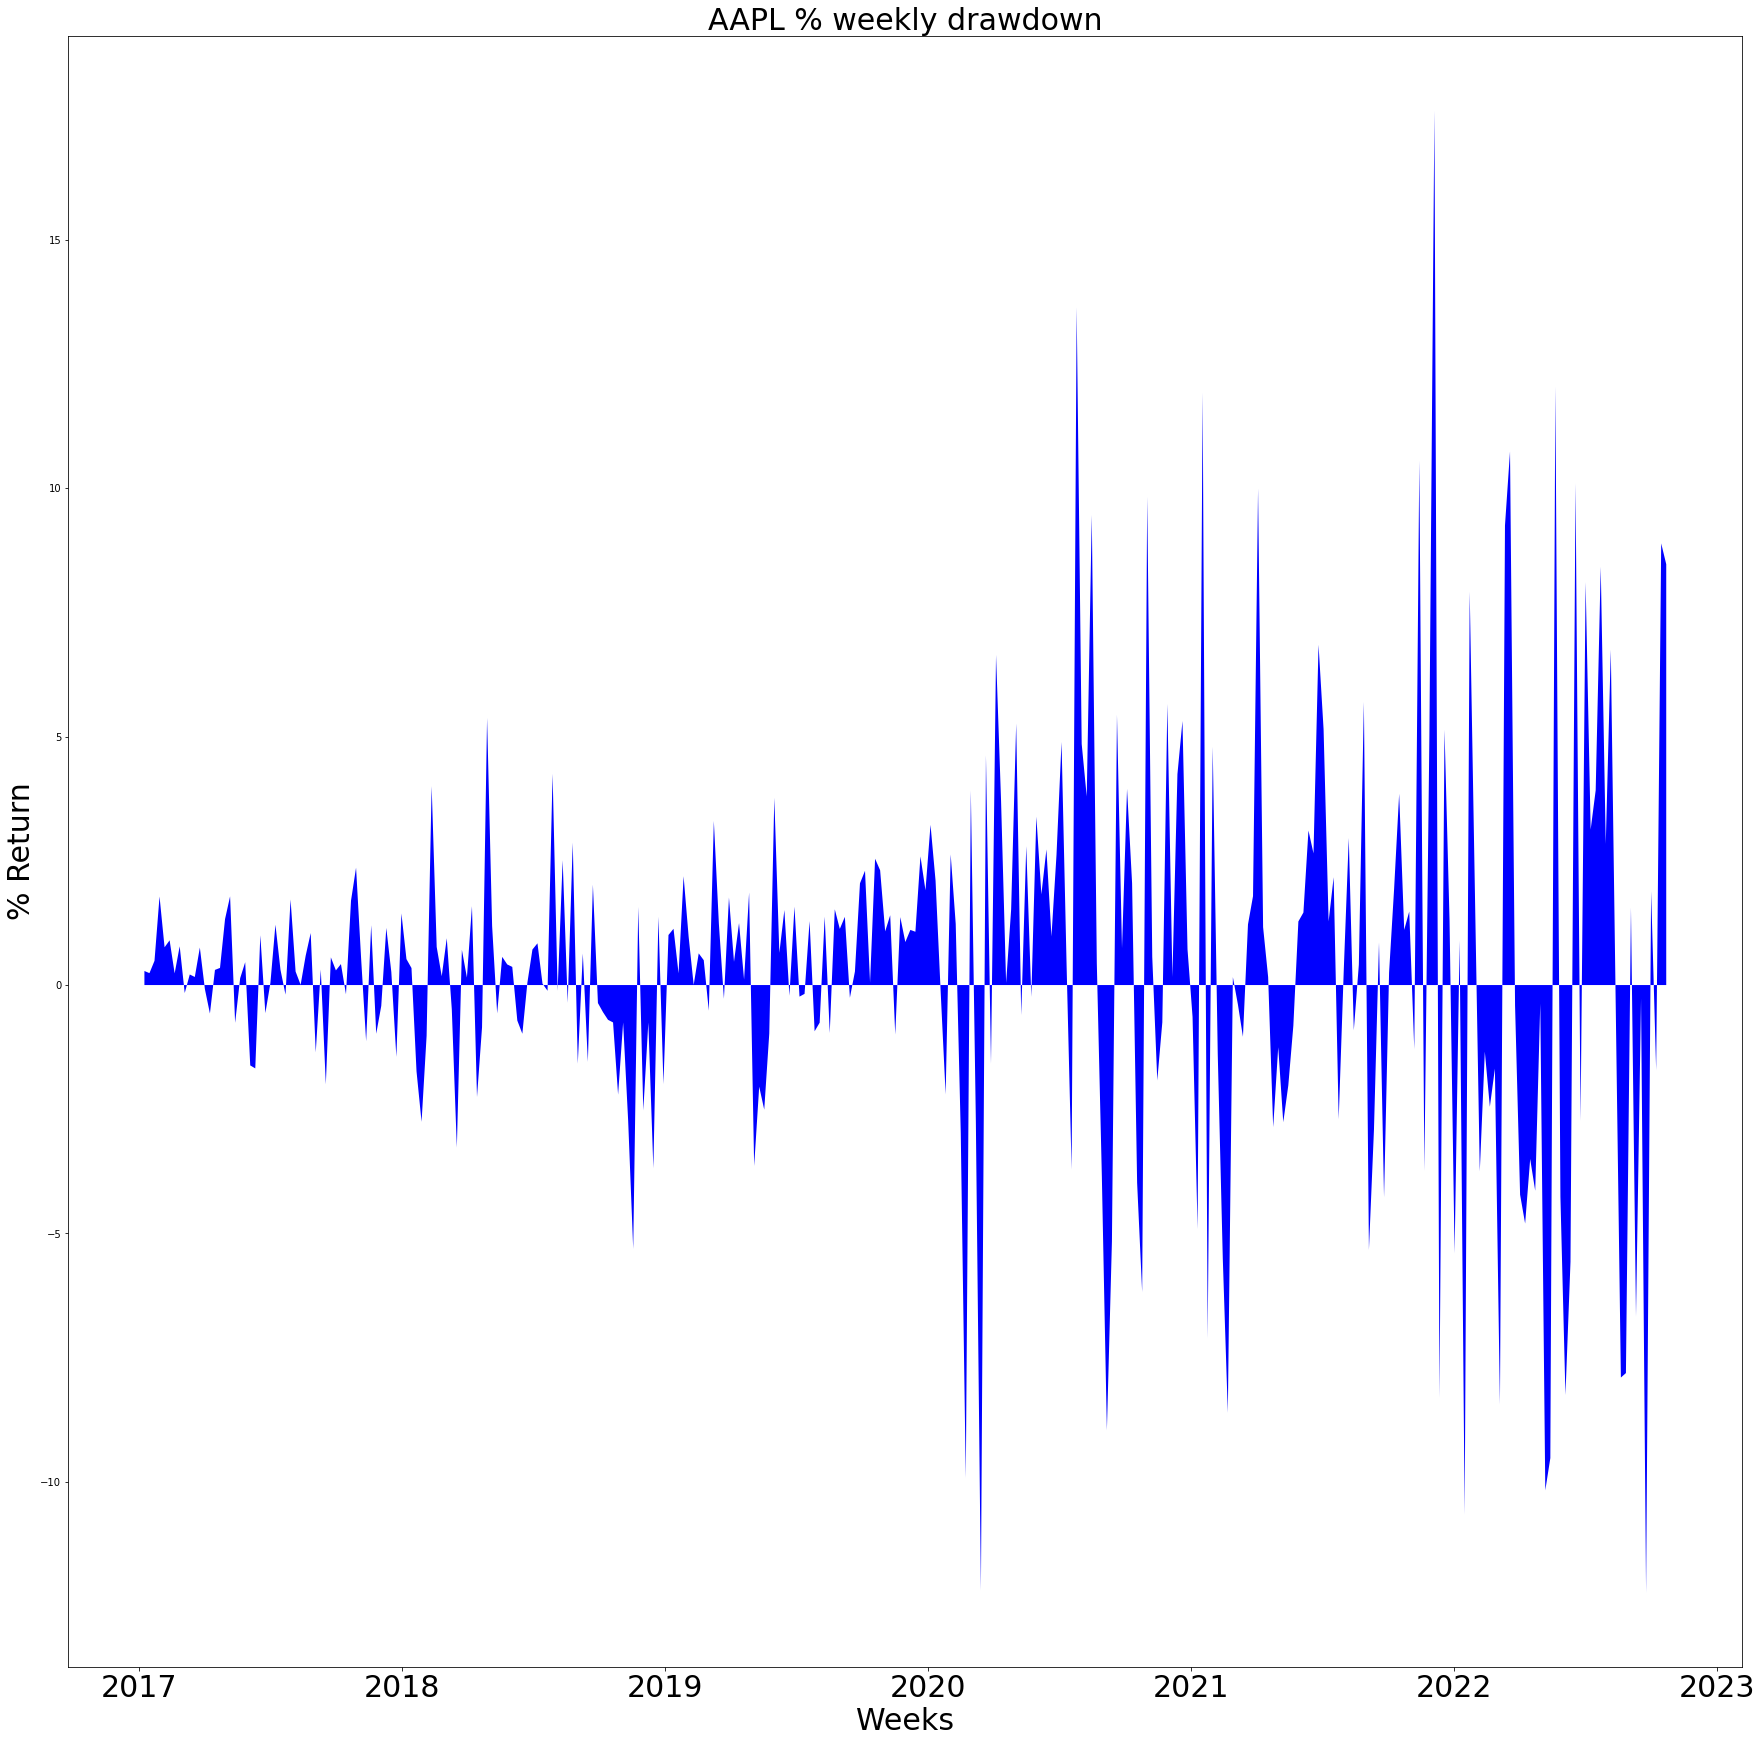

In [43]:
#Creating graph to display weekly drawdown for AAPL
fig= plt.figure(figsize=(30,30))
plt.stackplot(weekly_change["date"], weekly_change["AAPL change"], 
              colors ='b')
plt.xticks(fontsize = 30)
plt.xlabel('Weeks', fontsize = 30)
plt.ylabel('% Return', fontsize = 30)
plt.title('AAPL % weekly drawdown', fontsize =30)

# Displaying Graph
plt.show()

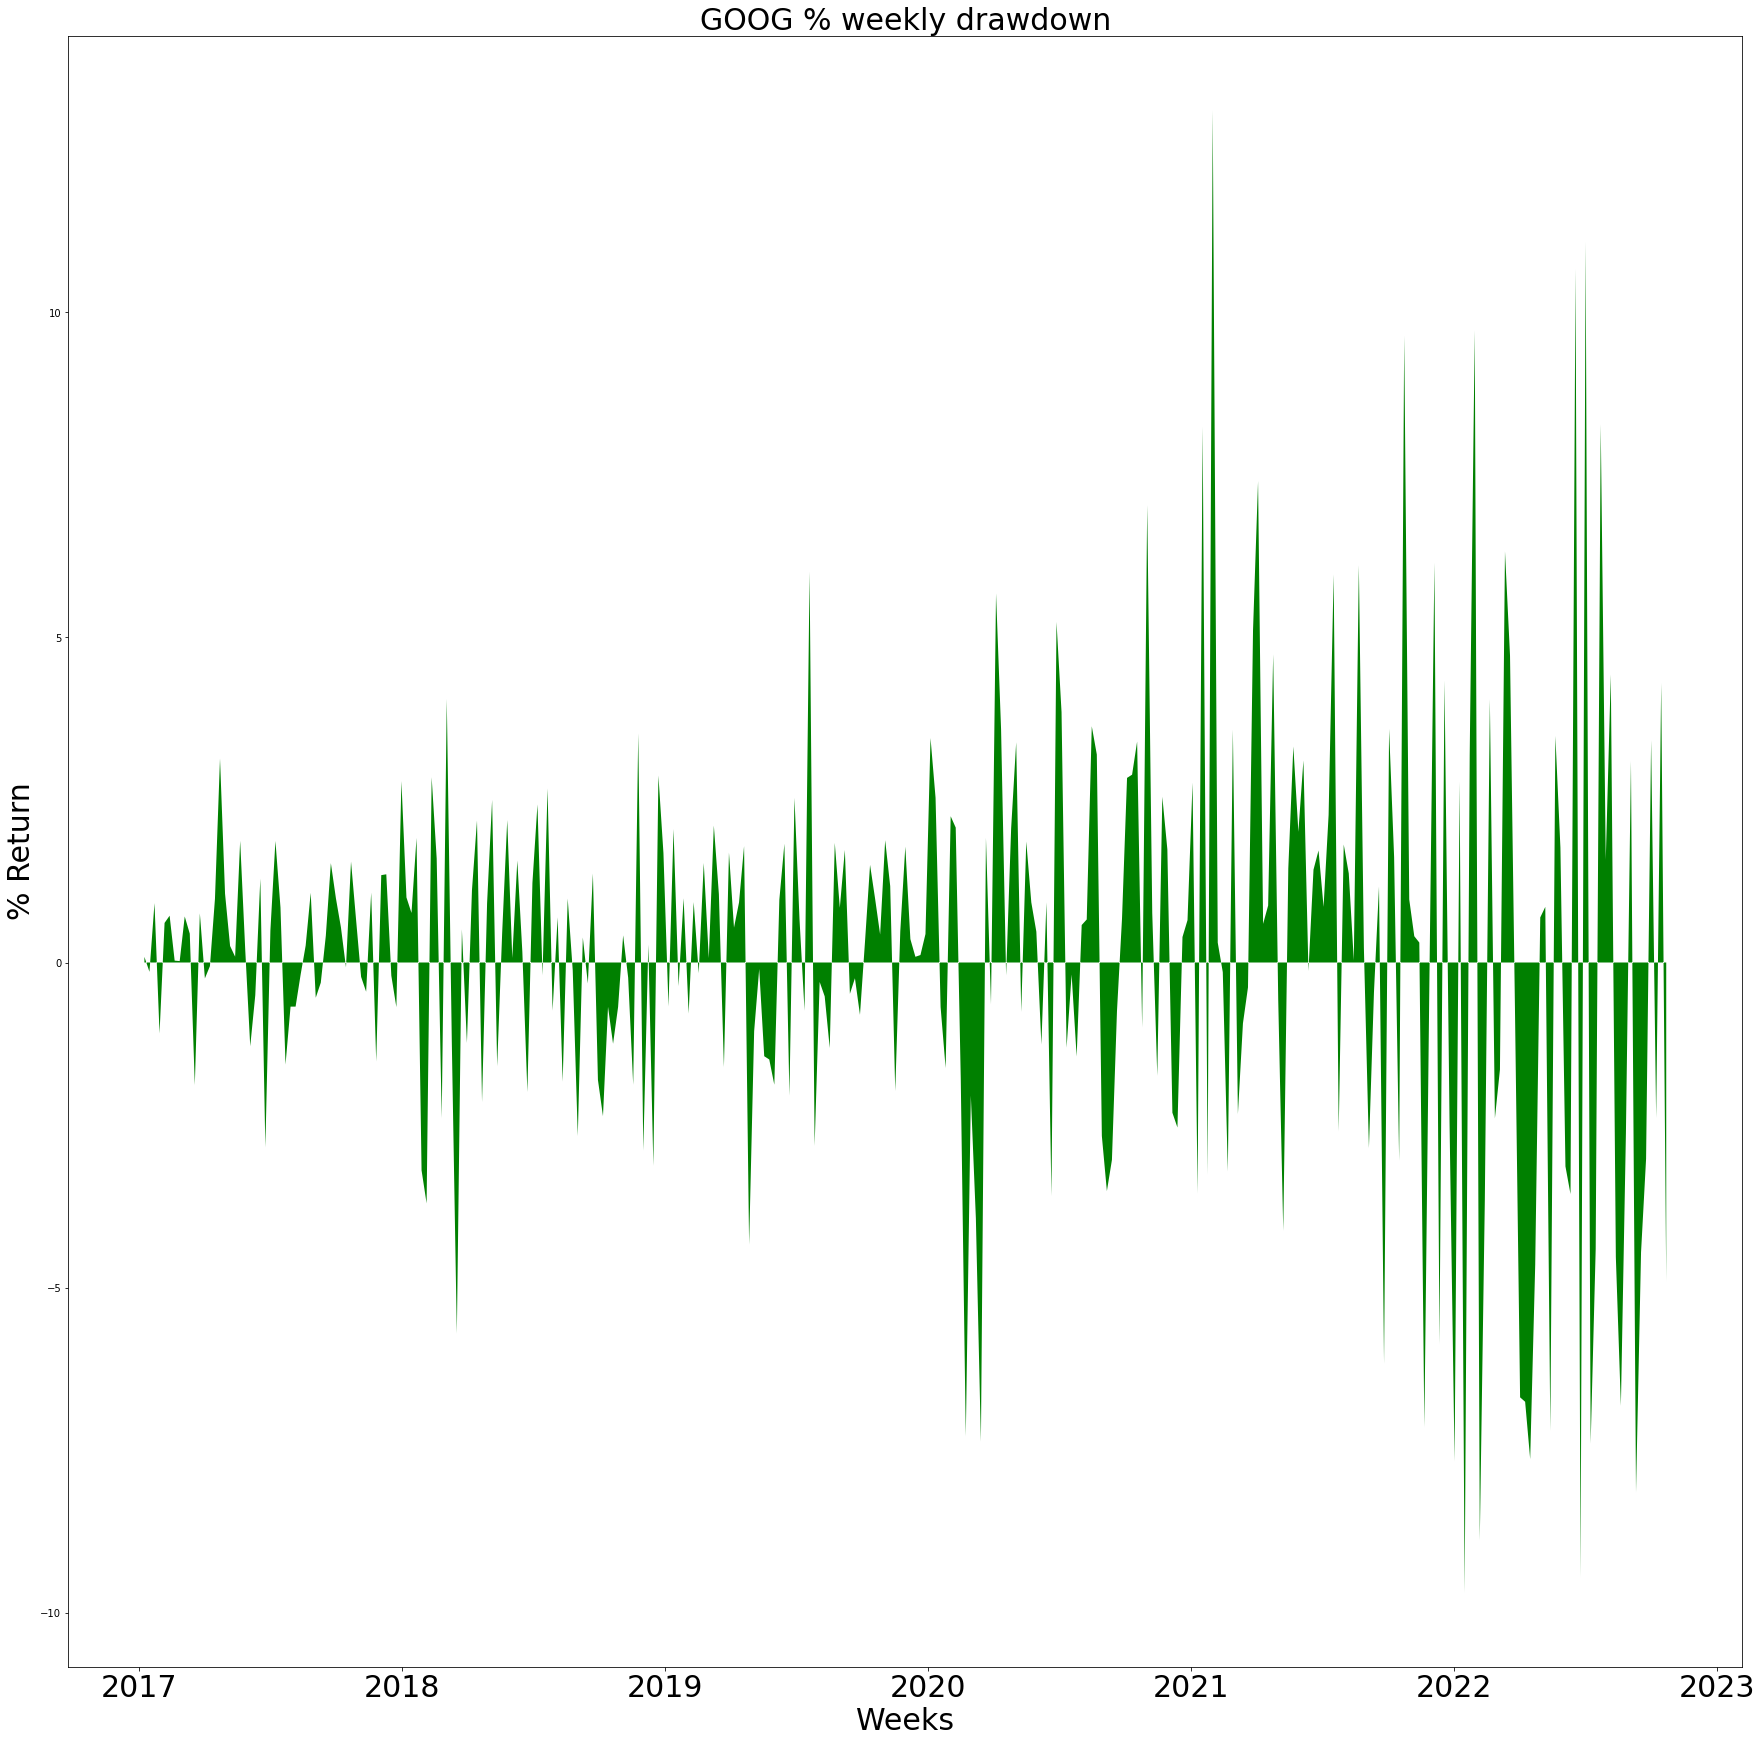

In [48]:
#Creating graph to display weekly drawdown for GOOG
fig= plt.figure(figsize=(30,30))
plt.stackplot(weekly_change["date"], weekly_change["GOOG change"], 
              colors ='g')
plt.xticks(fontsize = 30)
plt.xlabel('Weeks', fontsize = 30)
plt.ylabel('% Return', fontsize = 30)
plt.title('GOOG % weekly drawdown', fontsize =30)

# Displaying Graph
plt.show()

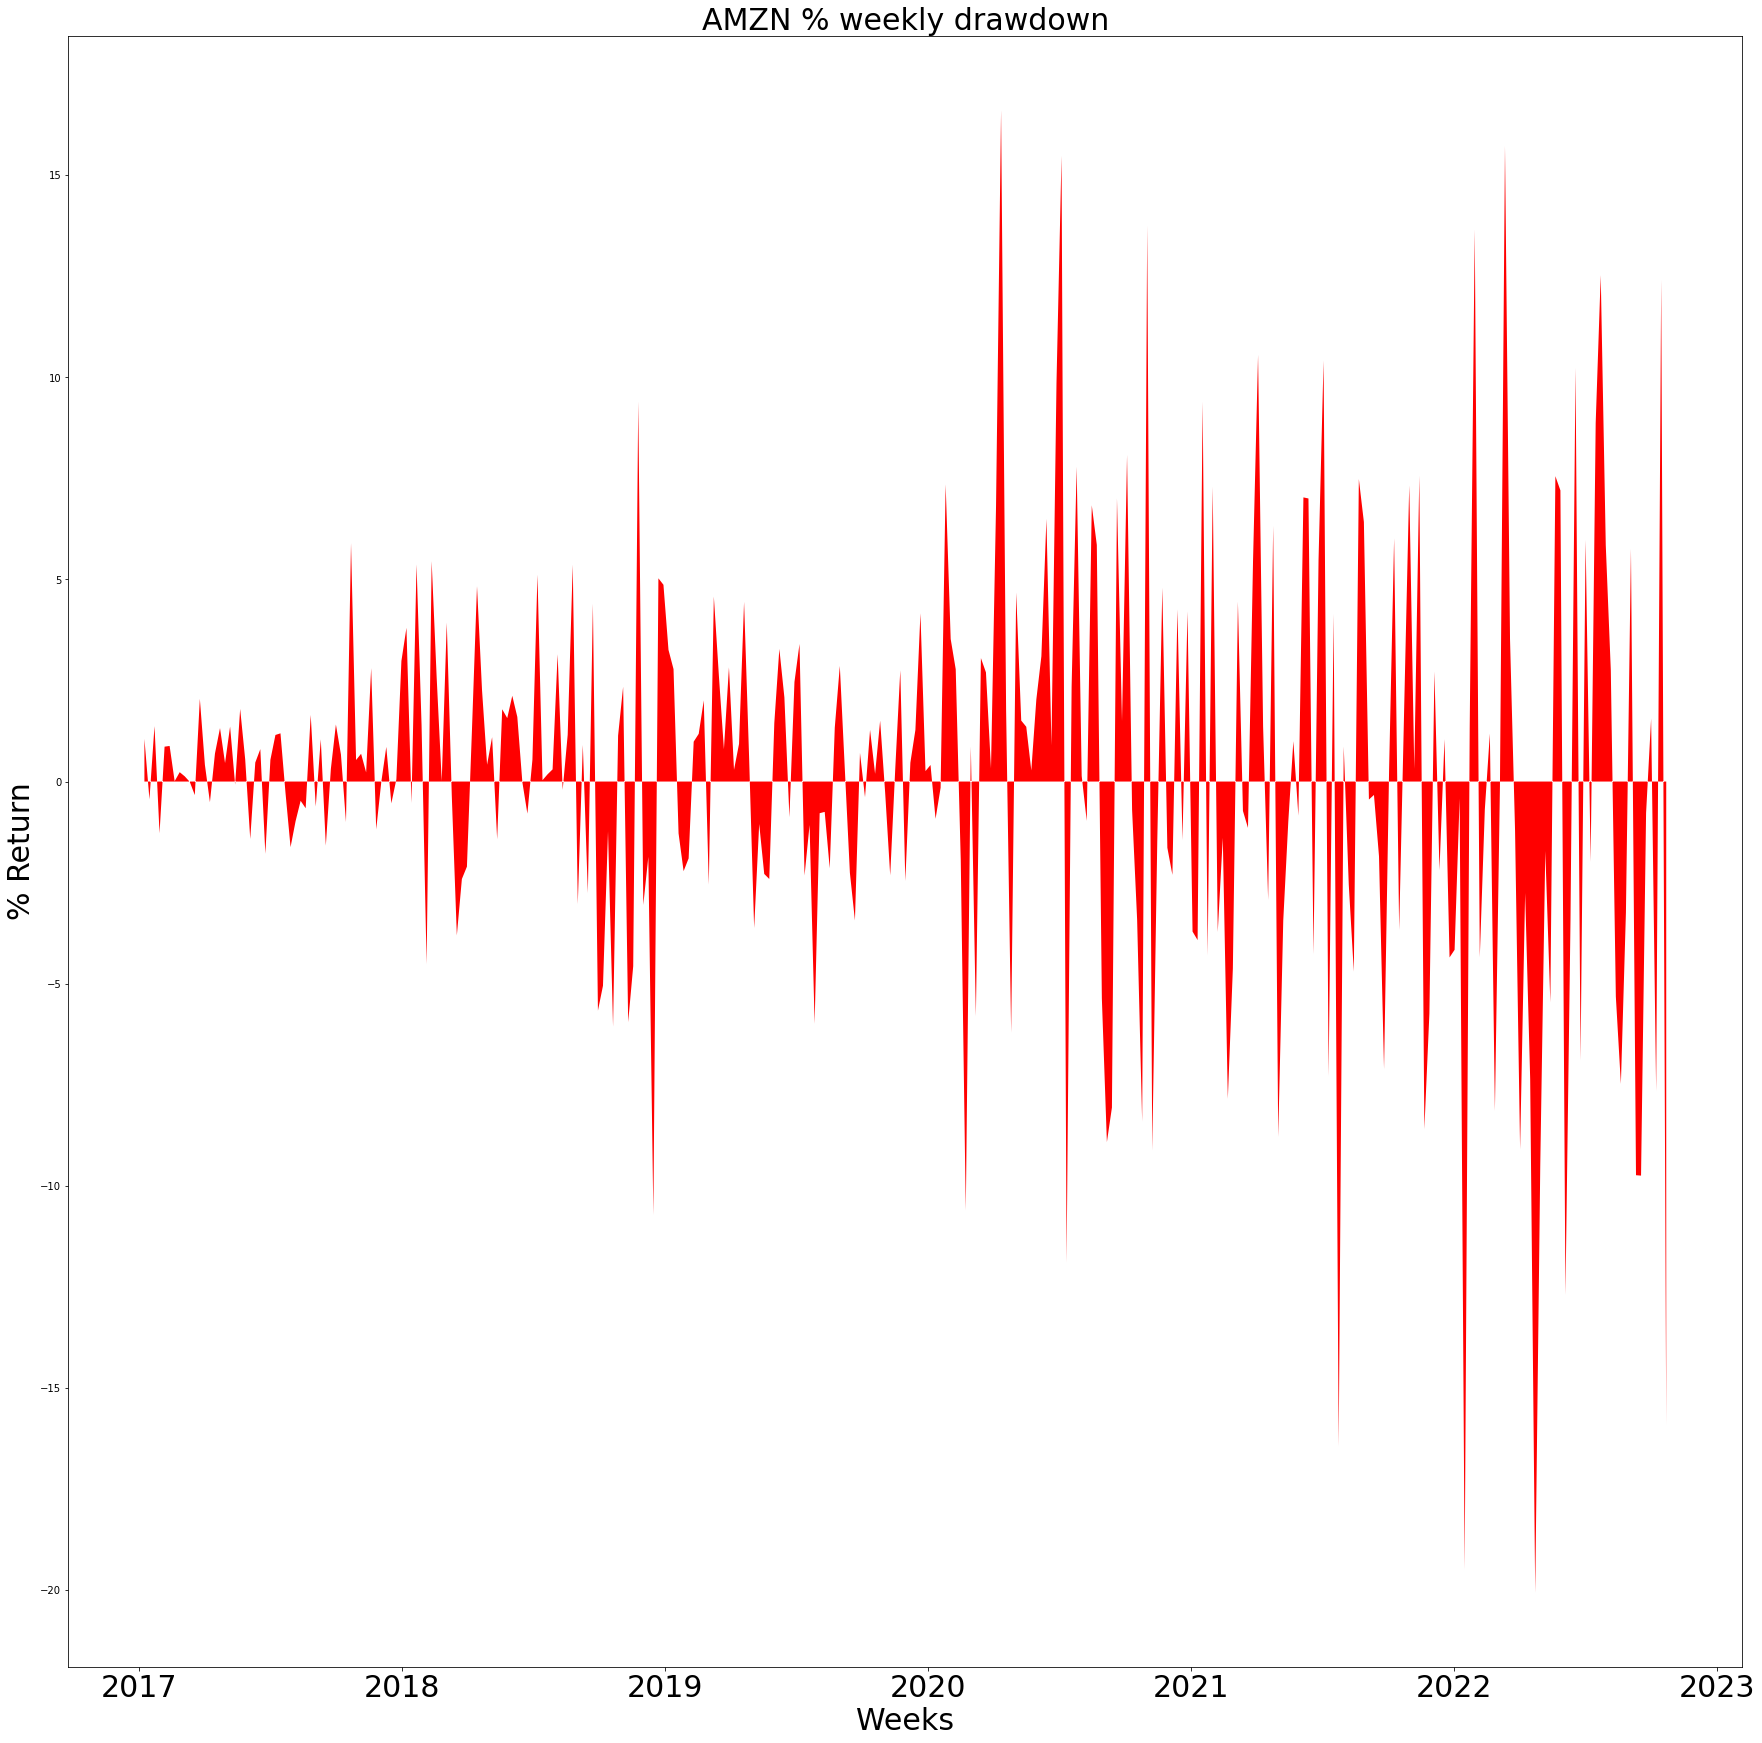

In [47]:
#Creating graph to display weekly drawdown for AMZN
fig= plt.figure(figsize=(30,30))
plt.stackplot(weekly_change["date"], weekly_change["AMZN change"], 
              colors ='r')
plt.xticks(fontsize = 30)
plt.xlabel('Weeks', fontsize = 30)
plt.ylabel('% Return', fontsize = 30)
plt.title('AMZN % weekly drawdown', fontsize =30)

# Displaying Graph
plt.show()